In [152]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [153]:
print(tf.__version__)

2.12.0


In [154]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
numpy.random.seed(7)

In [155]:
from numpy.core.fromnumeric import mean
import pandas as pd
dataset = pd.read_csv("diabetes3.csv")




In [156]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [157]:
def check_outliers(col,show1):
    Q1=show1[col].quantile(0.25)
    Q3=show1[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR


    outliers=[]

    for i in range(len(show1)):
        value=show1.loc[i,col]
        if value>upper_limit or value<lower_limit:
            outliers.append(value)
    return outliers

In [158]:
def handle_outliers(col,show1):
    Q1=show1[col].quantile(0.25)
    Q3=show1[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR

    for i in range(len(show1)):

        if show1.loc[i,col]>upper_limit:
            show1.loc[i,col]=upper_limit
        elif show1.loc[i,col]<lower_limit:
            show1.loc[i,col]=lower_limit

In [159]:


mean=dataset['Glucose'].mean()
dataset['Glucose'].replace(0, mean, inplace=True)
check_outliers('Glucose',dataset)
handle_outliers('Glucose',dataset)
check_outliers('Glucose',dataset)

mean=dataset['BloodPressure'].mean()
dataset['BloodPressure'].replace(0, mean, inplace=True)
check_outliers('BloodPressure',dataset)
handle_outliers('BloodPressure',dataset)
check_outliers('BloodPressure',dataset)

mean=dataset['SkinThickness'].mean()
dataset['SkinThickness'].replace(0, mean, inplace=True)
check_outliers('SkinThickness',dataset)
handle_outliers('SkinThickness',dataset)
check_outliers('SkinThickness',dataset)

mean=dataset['Insulin'].mean()
dataset['Insulin'].replace(0, mean, inplace=True)
check_outliers('Insulin',dataset)
handle_outliers('Insulin',dataset)
check_outliers('Insulin',dataset)

mean=dataset['BMI'].mean()
dataset['BMI'].replace(0, mean, inplace=True)
check_outliers('BMI',dataset)
handle_outliers('BMI',dataset)
check_outliers('BMI',dataset)

mean=dataset['DiabetesPedigreeFunction'].mean()
dataset['DiabetesPedigreeFunction'].replace(0, mean, inplace=True)
check_outliers('DiabetesPedigreeFunction',dataset)
handle_outliers('DiabetesPedigreeFunction',dataset)
check_outliers('DiabetesPedigreeFunction',dataset)

mean=dataset['Age'].mean()
dataset['Age'].replace(0, mean, inplace=True)
check_outliers('Age',dataset)
handle_outliers('Age',dataset)
check_outliers('Age',dataset)

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,80.127890,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,69.134393,20.824422,80.127890,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,204.808165,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,204.808165,40.7,0.536,21,0


In [164]:
X = dataset.iloc[:, 0:8].values # INpUT < matrix 2D
y = dataset.iloc[:, 8].values   # output < vector 1D
#mean=dataset[X].mean()
#dataset[X].fillna(mean,inplace=True)
x=pd.DataFrame(X)
print(x.head())



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


     0      1          2          3           4     5      6     7
0  2.0  138.0  62.000000  35.000000   80.127890  33.6  0.127  47.0
1  0.0   84.0  82.000000  31.000000  125.000000  38.2  0.233  23.0
2  0.0  145.0  69.134393  20.824422   80.127890  44.2  0.630  31.0
3  0.0  135.0  68.000000  42.000000  204.808165  42.3  0.365  24.0
4  1.0  139.0  62.000000  41.000000  204.808165  40.7  0.536  21.0


In [161]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train,y_train)


y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
acc=(cm[0][0]+cm[1][1])/len(y_test)
#Accuracy=Accuracy+acc
#print('Accuracy is %f'%(acc*100))

#Accuracy=Accuracy/20
#print('Total Accuracy equals= %f'%(Accuracy*100))
precision=cm[1][1]/(cm[1][1]+cm[0][1])
true_pos_rate=cm[1][1]/(cm[1][1]+cm[1][0])
true_neg_rate=cm[0][0]/(cm[0][0]+cm[0][1])
print('Decision Tree:')
print('Accuracy= ',acc*100)
print('Precision=', precision*100)
print('True Positive Rate=',true_pos_rate*100)
print('True Negative Rate= ',true_neg_rate*100)

Decision Tree:
Accuracy=  83.27316486161251
Precision= 78.92561983471074
True Positive Rate= 68.45878136200717
True Negative Rate=  90.76086956521739


In [165]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 268)#K
classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier1.predict(X_test)

cm1=confusion_matrix(y_test, y_pred)
acc1=(cm1[0][0]+cm1[1][1])/len(y_test)
#Accuracy=Accuracy+acc
#print('Accuracy is %f'%(acc*100))

#Accuracy=Accuracy/20
#print('Total Accuracy equals= %f'%(Accuracy*100))
precision=cm1[1][1]/(cm1[1][1]+cm1[0][1])
true_pos_rate=cm1[1][1]/(cm1[1][1]+cm1[1][0])
true_neg_rate=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Decision Tree:')
print('Accuracy= ',acc1*100)
print('Precision=', precision*100)
print('True Positive Rate=',true_pos_rate*100)
print('True Negative Rate= ',true_neg_rate*100)


Decision Tree:
Accuracy=  76.77496991576413
Precision= 73.26732673267327
True Positive Rate= 51.56794425087108
True Negative Rate=  90.07352941176471


In [185]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)


y_pred=tree.predict(X_test)

cm22=confusion_matrix(y_test, y_pred)
acc22=(cm22[0][0]+cm22[1][1])/len(y_test)
#Accuracy=Accuracy+acc
#print('Accuracy is %f'%(acc*100))

#Accuracy=Accuracy/20
#print('Total Accuracy equals= %f'%(Accuracy*100))
precision22=cm22[1][1]/(cm22[1][1]+cm22[0][1])
true_pos_rate22=cm22[1][1]/(cm22[1][1]+cm22[1][0])
true_neg_rate22=cm22[0][0]/(cm22[0][0]+cm22[0][1])
print('Decision Tree:')
print('Accuracy= ',acc22*100)
print('Precision=', precision22*100)
print('True Positive Rate=',true_pos_rate22*100)
print('True Negative Rate= ',true_neg_rate22*100)

Decision Tree:
Accuracy=  99.39831528279181
Precision= 98.28767123287672
True Positive Rate= 100.0
True Negative Rate=  99.08088235294117


In [175]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier(n_estimators=10,criterion='entropy')
rand_forest.fit(X_train, y_train)

y_pred_forest=rand_forest.predict(X_test)

cm_forest=confusion_matrix(y_test, y_pred_forest)
acc_forest=(cm_forest[0][0]+cm_forest[1][1])/len(y_test)
precision5=cm_forest[1][1]/(cm_forest[1][1]+cm_forest[0][1])
true_pos_rate5=cm_forest[1][1]/(cm_forest[1][1]+cm_forest[1][0])
true_neg_rate5=cm_forest[0][0]/(cm_forest[0][0]+cm_forest[0][1])

print('Random Forest:')
print('Accuracy: ',acc_forest*100)
print('Precision=', precision5*100)
print('True Positive Rate=',true_pos_rate5*100)
print('True Negative Rate= ',true_neg_rate5*100)



Random Forest:
Accuracy:  98.43561973525873
Precision= 96.5986394557823
True Positive Rate= 98.95470383275261
True Negative Rate=  98.16176470588235


In [182]:

from sklearn.linear_model import LogisticRegression
classifier4=LogisticRegression(random_state=0)
classifier4.fit(X_train,y_train)

y_pred=classifier4.predict(X_train)
"""
from sklearn.metrics import confusion_matrix

cm6=confusion_matrix(y_test, y_pred)
acc6=(cm6[0][0]+cm6[1][1])/len(y_test)
precision6=cm6[1][1]/(cm6[1][1]+cm6[0][1])
true_pos_rate6=cm6[1][1]/(cm6[1][1]+cm6[1][0])
true_neg_rate6=cm6[0][0]/(cm6[0][0]+cm6[0][1])

print('Random Forest:')
print('Accuracy: ',acc6*100)
print('Precision=', precision6*100)
print('True Positive Rate=',true_pos_rate6*100)
print('True Negative Rate= ',true_neg_rate6*100)
"""

"\nfrom sklearn.metrics import confusion_matrix\n\ncm6=confusion_matrix(y_test, y_pred)\nacc6=(cm6[0][0]+cm6[1][1])/len(y_test)\nprecision6=cm6[1][1]/(cm6[1][1]+cm6[0][1])\ntrue_pos_rate6=cm6[1][1]/(cm6[1][1]+cm6[1][0])\ntrue_neg_rate6=cm6[0][0]/(cm6[0][0]+cm6[0][1])\n\nprint('Random Forest:')\nprint('Accuracy: ',acc6*100)\nprint('Precision=', precision6*100)\nprint('True Positive Rate=',true_pos_rate6*100)\nprint('True Negative Rate= ',true_neg_rate6*100)\n"

In [186]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test , y_pred)
MSE

0.006016847172081829

In [187]:
model= Sequential()
model.add(Dense(12,input_dim=8,activation ='relu'))
model.add(Dense(8,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))


In [188]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [189]:
history=model.fit(X_train,y_train, epochs=150, batch_size=10)

Epoch 1/150
194/194 [==============================] - 1s 1ms/step - loss: 0.5947 - accuracy: 0.6892
Epoch 2/150
194/194 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7574
Epoch 3/150
194/194 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7734
Epoch 4/150
194/194 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.7728
Epoch 5/150
194/194 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.7785
Epoch 6/150
194/194 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7780
Epoch 7/150
194/194 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7852
Epoch 8/150
194/194 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.7765
Epoch 9/150
194/194 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.7816
Epoch 10/150
194/194 [==============================] - 0s 1ms/step - loss: 0.4183 - accura

In [190]:
#Evaluate the model
X=pd.DataFrame(X)
print(X.head())
scores = model.evaluate(X_test,y_test)
scores1 = model.evaluate(X_train,y_train)

     0      1          2          3           4     5      6     7
0  2.0  138.0  62.000000  35.000000   80.127890  33.6  0.127  47.0
1  0.0   84.0  82.000000  31.000000  125.000000  38.2  0.233  23.0
2  0.0  145.0  69.134393  20.824422   80.127890  44.2  0.630  31.0
3  0.0  135.0  68.000000  42.000000  204.808165  42.3  0.365  24.0
4  1.0  139.0  62.000000  41.000000  204.808165  40.7  0.536  21.0
61/61 [==============================] - 0s 968us/step - loss: 0.2718 - accuracy: 0.8854


In [191]:
print("\n%s:%.2f%%"% (model.metrics_names[1],scores[1]*100))


accuracy:87.48%


In [26]:
#pip install ann_visualizer

In [77]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title= "My fisrt neural network2")

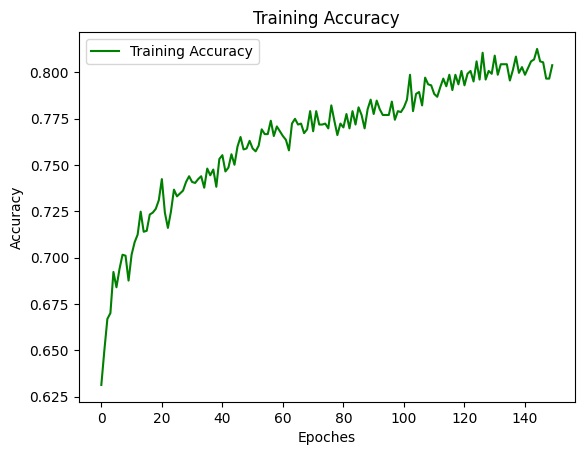

In [78]:

accuracy=history.history['accuracy']
plt.plot(accuracy,'g',label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [79]:
print(len(accuracy))

150


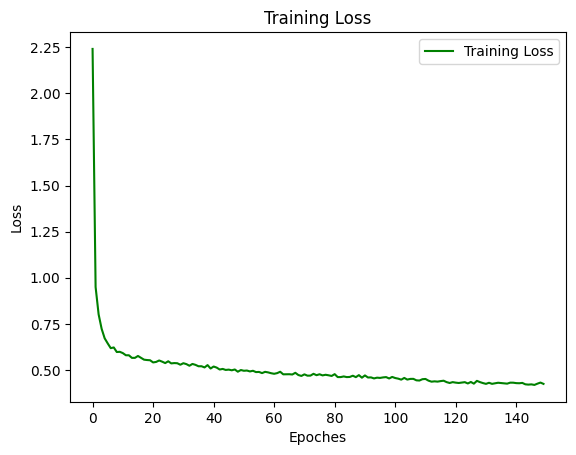

In [80]:
loss=history.history['loss']
plt.plot(loss,'g',label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()